# PS 1 - Marius Grünewald

In [1]:
# PS 1 - Metrics III, Coding part
using Statistics, Distributions, Plots, LaTeXStrings, Random, GLM, DataFrames, FredData, CSV, ShiftedArrays

## Question 1

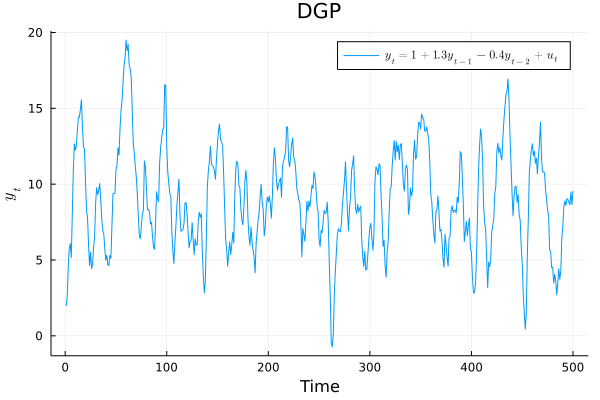

In [2]:
# e) - Simulate impulse response function with a single y_t
# Already create for T=500 (save work for later)
Random.seed!(1234); # set seed
T = 1:500; error = randn(500); # normally-distributed random number with mean 0 and standard deviation 1
y = zeros(500); # place holder
y[1] = 1 + error[1]; y[2] = 1 + 1.3y[1] + error[2] # populate first 2 obs

# Populate according to model in 1)
for t in T[3:end]
    y[t] = 1 + 1.3y[t-1] - 0.4y[t-2] + error[t]
end

plot(T, y, title = "DGP", label = L"y_t = 1 + 1.3y_{t-1} - 0.4y_{t-2} + u_t", lw = 1, xlabel="Time", ylabel=L"y_t")

In [3]:
savefig("C:\\Users\\mariu\\Documents\\EUI_orga\\eui\\ar_dgp.png")

### How to get to an IRF 
The marginal effects of an <i>AR(2)</i> process can be stated as:
<ol>
    <li> We know that the error terms impact any <i>y</i> with coefficient $1$ in the contemporaneous period (as no coef in DGP). Fruther, it does not enter via lagged dependent variables.</li>
    <li> The first lag of the IRF - $\frac{\partial y_{t+1}}{\partial\epsilon_{t}}$ - we suspect that it only effects via the first lag $y_{t}$. The derivative confirms this intuition: $\frac{\partial y_{t+1}}{\partial\epsilon_{t}} = \phi_1 = 1.3 $</li>
    <li> The second lag of the error term $\epsilon_{t}$ enters directly via the second lag $y_{t}$ with coefficient $\phi_2 = -0.4$ and $y_{t+1}$ and some backwards indcution. The partial derivative $\frac{\partial y_{t+2}}{\partial\epsilon_{t}} = \phi_1^2 - \phi_2 = 1.29$ </li>
    <li> For any higher order part of the IRF, we need backwards induction. This means we "discount" the effect with one more coefficient. $ \frac{\partial y_{t+j}}{\partial\epsilon_{t}} = \phi_1 \frac{\partial y_{t+j-1}}{\partial\epsilon_{t}} + \phi_2\frac{\partial y_{t+j-2}}{\partial\epsilon_{t}} \: \forall j \in (3,500)$ </li>



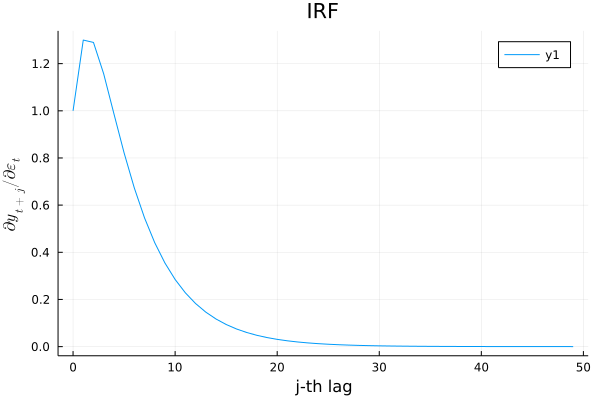

In [4]:
# Generate the IRF 
irf_y = ones(500); # set up first element following explanations above
irf_y[2] = 1.3; irf_y[3] = 1.29; # second and third

# Create higher order lags
for t in T[4:end]
    irf_y[t] = 1.3*irf_y[t-1] - 0.4*irf_y[t-2]
end
xaxis = 0:499;
plot(xaxis[1:50], irf_y[1:50], title = "IRF", xlabel="j-th lag", ylabel=L"\partial y_{t+j}/\partial\epsilon_{t}")

In [5]:
savefig("C:\\Users\\mariu\\Documents\\EUI_orga\\eui\\ar_irf.png")

In [7]:
# f) Simulate series of 500 t (already done in part e) and plot sample (partial) autocorrelation

mean_y = mean(y);
autocorr = zeros(30);

# sample autocorrelation
for j in 1:30 # for any given number of lags
    corr_j = 0
    println(T[j+1:end])
    for t in T[j+1:end] # any period where t-jth lag still exists
        temp_corr = (y[t] - mean_y)*(y[t-j] - mean_y) # Formula for any given number of lags
        corr_j = corr_j + temp_corr # sum over these time periods
    end
    autocorr[j] = corr_j
end
autocorr = autocorr/autocorr[1]; #standardize

2:500
3:500
4:500
5:500
6:500
7:500
8:500
9:500
10:500
11:500
12:500
13:500
14:500
15:500
16:500
17:500
18:500
19:500
20:500
21:500
22:500
23:500
24:500
25:500
26:500
27:500
28:500
29:500
30:500
31:500


In [8]:
# Generate lagged var and store them in matrix
ys = zeros(500, 31);
for column in 1:31
    temp = y[1:end-column+1] .- mean_y # demean 
    ys[column:end,column] = temp
end

In [9]:
# partial autocorrelation
# Regress the current value of y on its previous values and take coefficients
df = DataFrame(ys, :auto);
coef_list = zeros(30)
for j in 1:30
    model = lm(Term(:x1) ~ sum(Term.(Symbol.(names(df[:, Not(:x1)]))))[1:j], df) #regression
    coef_ = coef(model)[end] # take newest lag 
    coef_list[j] = coef_ # store it
end

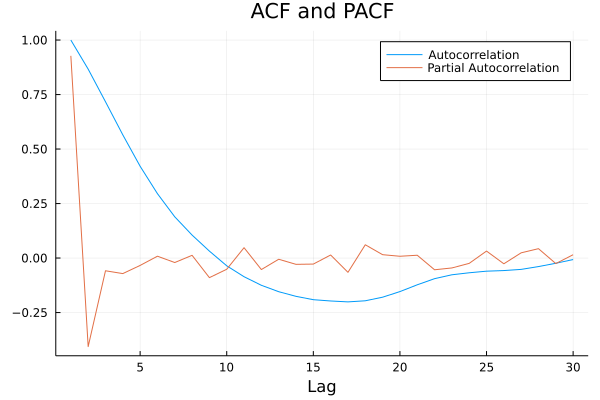

In [10]:
# plot it
common_store = autocorr, coef_list
x = 1:30
p = plot(x, autocorr, label = "Autocorrelation", title= "ACF and PACF")
plot!(p, x, coef_list, label = "Partial Autocorrelation", xlabel="Lag")

In [11]:
savefig("C:\\Users\\mariu\\Documents\\EUI_orga\\eui\\ar_acf_pacf.png")

We can observe that they are somewhat different from each other. While the autocorrelation is slowly decaying, the partial autocorrelation is around 0 for any lags not included in DGP.

## Question 2

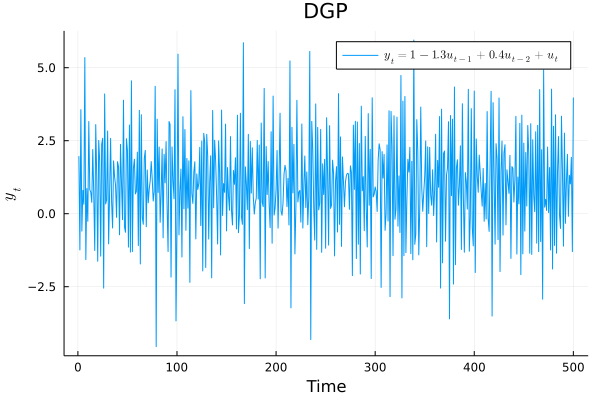

In [12]:
# f) - Simulate impulse response function with a single y_t
# Already create for T=500 (save work for later)
Random.seed!(1234); # set seed
error2 = randn(500); # normally-distributed random number with mean 0 and standard deviation 1
y2 = zeros(500); # place holder
y2[1] = 1 + error2[1]; y2[2] = 1 - 1.3error2[1] + error2[2] # populate first 2 obs

# Populate according to model in 1)
for t in T[3:end]
    y2[t] = 1 - 1.3error2[t-1] + 0.4error2[t-2] + error2[t]
end

plot(T, y2, title = "DGP", label = L"y_t = 1 - 1.3u_{t-1} + 0.4u_{t-2} + u_t", lw = 1, xlabel="Time", ylabel=L"y_t")

In [13]:
savefig("C:\\Users\\mariu\\Documents\\EUI_orga\\eui\\ma_dgp.png")

Partial derivatives for the impulse response functions are straight-forward. They are the respective coefficients for the contemporaneous error term and the two lags ($-1$ and $-2$). All other derivates yield 0.

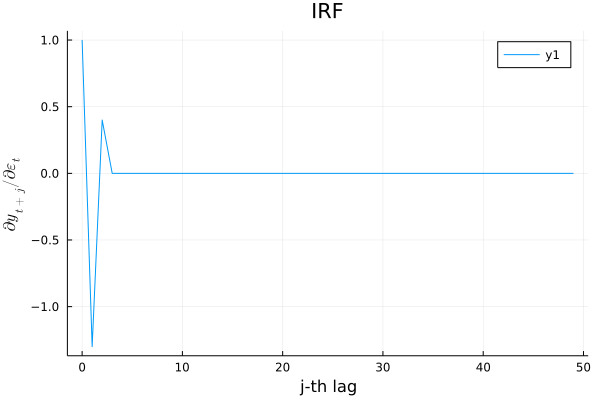

In [14]:
# Generate the IRF 
irf_y2 = zeros(500); # set up first element following explanations above
irf_y2[1] = 1; irf_y2[2] = -1.3; irf_y2[3] = 0.4; # first, second and third recode


xaxis = 0:499;
plot(xaxis[1:50], irf_y2[1:50], title = "IRF", xlabel="j-th lag", ylabel=L"\partial y_{t+j}/\partial\epsilon_{t}")

In [15]:
savefig("C:\\Users\\mariu\\Documents\\EUI_orga\\eui\\ma_irf.png")

In [16]:
mean_y2 = mean(y2);
autocorr2 = zeros(20);

# sample autocorrelation - same as above
for j in 1:20
    corr_j2 = 0
    for t in T[j+1:end]
        temp_corr2 = (y2[t] - mean_y2)*(y2[t-j] - mean_y2)
        corr_j2 = corr_j2 + temp_corr2 
    end
    autocorr2[j] = corr_j2
end
autocorr2 = autocorr2/autocorr2[1];

In [17]:
# Generate lagged var and store them in matrix
ys2 = zeros(500, 21);
for column in 1:21
    temp2 = y2[1:end-column+1] .- mean_y2 # demean 
    ys2[column:end,column] = temp2
end

In [18]:
# partial autocorrelation
# Regress the current value of y on its previous values and take coefficients
df2 = DataFrame(ys2, :auto);
coef_list2 = zeros(20)
for j in 1:20 # same as above
    model2 = lm(Term(:x1) ~ sum(Term.(Symbol.(names(df2[:, Not(:x1)]))))[1:j], df2) # regression
    coef_2 = coef(model2)[end]
    coef_list2[j] = coef_2
end

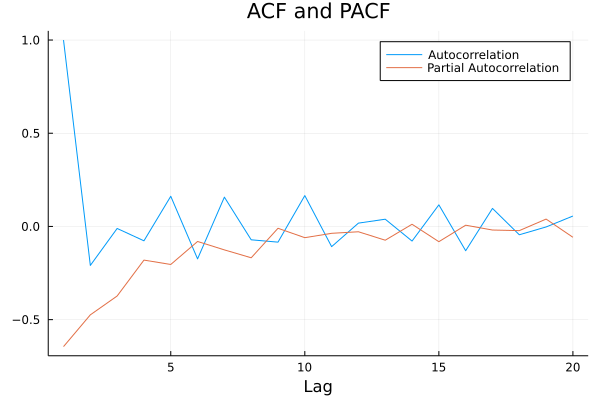

In [19]:
# plot it
x2 = 1:20
p2 = plot(x2, autocorr2, label = "Autocorrelation", title= "ACF and PACF")
plot!(p2, x2, coef_list2, label = "Partial Autocorrelation", xlabel="Lag")

In [20]:
savefig("C:\\Users\\mariu\\Documents\\EUI_orga\\eui\\ma_acf_pacf.png")

In this case, we can see roughly the opposite behaviour. The Autocorrelation yields a sharp drop after the first lag with all remaining being roughly around zero. The partial autocorrelation, however, exhibits a gradual decay similar to the autocorrelation for the AR process.

## Question 3

<b> General note: It appears to me that the latest data should be included (up to 2021 not only 2020). Therefore, I included data until December 2021 and my answers might differ slightly for any solution using data only until 2020 </b>

In [21]:
# Plausibly change the directory
dfred = CSV.read("C:\\Users\\mariu\\Downloads\\UNRATE.csv", DataFrame);
dfred = dfred[:,[2]];

In [22]:
# Create Reference lines
ref_line_up = 2/(888^0.5)
ref_line_down = -2/(888^0.5);

In [23]:
mean_un = mean(dfred[!,"UNRATE"]);
autocorr_un = zeros(24);
T_un = 1:24;
# sample autocorrelation
for j in 1:24
    corr_un = 0
    for t in T_un[j+1:end]
        temp_corr_un = (dfred[!,"UNRATE"][t] - mean_un)*(dfred[!,"UNRATE"][t-j] - mean_un) # formula
        corr_un = corr_un + temp_corr_un # sum over t's
    end
    autocorr_un[j] = corr_un # store at corresponding j position
end
autocorr_un = autocorr_un/autocorr_un[1];

In [24]:
# Generate lagged var and store them in matrix
col_name = [:lag1,:lag2,:lag3,:lag4,:lag5,:lag6,:lag7,:lag8,:lag9,:lag10,:lag11,:lag12,:lag13,:lag14,:lag15,:lag16,:lag17,:lag18,:lag19,:lag20,:lag21,:lag22,:lag23,:lag24]
for (i,col) in zip(1:24,col_name)
    s = lag(dfred[!,1], i)
    dfred[:,col] = s
end

In [25]:
# Replace missing with 0's
for column_ in col_name
    collect(Missings.replace(dfred[!,column_], 0))
end

In [26]:
# Same procedure as above: Regress on j lags, take the j-th lag.
coef_list_un = zeros(24)
for j in 1:24
    model_un = lm(Term(:UNRATE) ~ sum(Term.(Symbol.(names(dfred[:, Not(:UNRATE)]))))[1:j], dfred)
    coef_un = coef(model_un)[end]
    coef_list_un[j] = coef_un
end

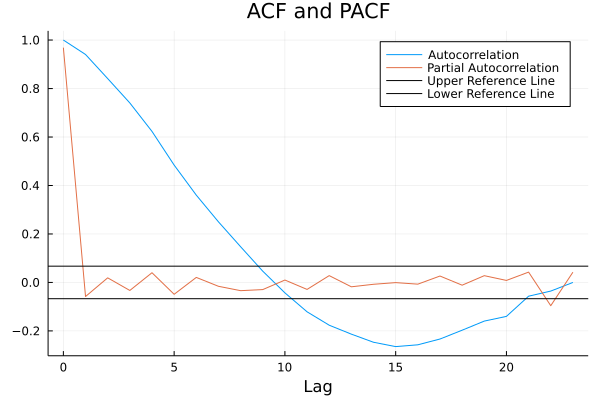

In [29]:
# plot it
x_un = 0:23
p_un = plot(x_un, autocorr_un, label = "Autocorrelation", title= "ACF and PACF")
p_un = plot!(p_un, x_un, coef_list_un, label = "Partial Autocorrelation", xlabel="Lag")
p_un = plot!([ref_line_up], seriestype="hline", label="Upper Reference Line", color=:black)
plot!([ref_line_down], seriestype="hline", label="Lower Reference Line", color=:black)

In [28]:
savefig("C:\\Users\\mariu\\Documents\\EUI_orga\\eui\\unrate_acf_pacf.png")

The gradual decay in the autocorrelation suggests an AR over a MA process. 
The abrupt stop of the partial autocorrelation at the second lag indicates to include only one lag. This seems to go in line with a statistical idea of modelling, as the amount of degrees of freedom used will be small.